<a href="https://colab.research.google.com/github/varsha2176/Data_Science_Prodigy/blob/main/prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
print(data.columns)
if 'Cabin' in data.columns:
    data = data.drop(columns=['Cabin'])
data['Age'] = data['Age'].fillna(data['Age'].median())
if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
print(data.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
m

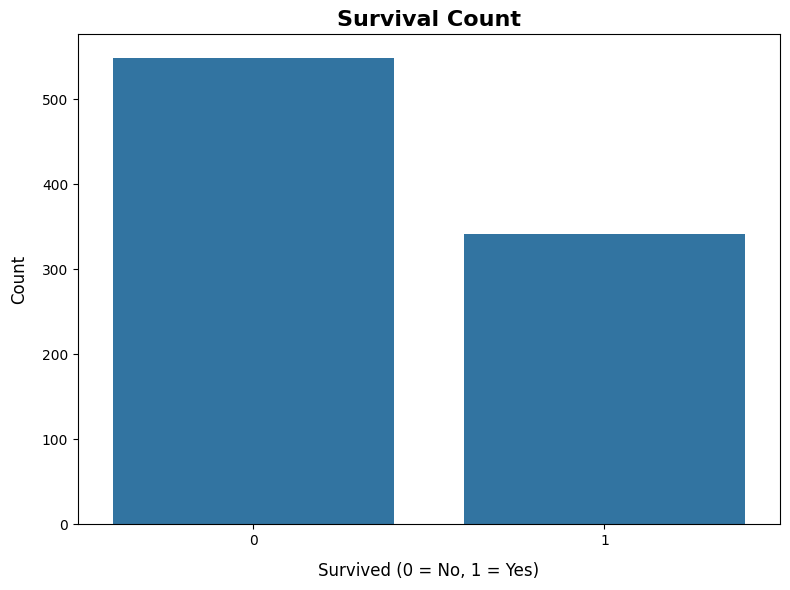

In [40]:
#survival count
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(
    x='Survived',
    data=data
)
plt.title("Survival Count", fontsize=16, fontweight='bold')
plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12, labelpad=10)
plt.ylabel("Count", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()

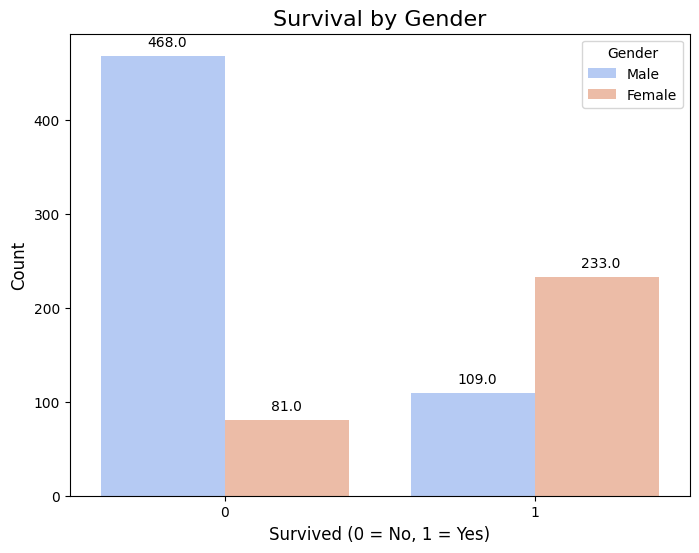

In [21]:
#survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data, palette='coolwarm')
plt.title("Survival by Gender", fontsize=16)
plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
for p in plt.gca().patches:
    count = p.get_height()
    if count > 0:
        plt.gca().annotate(f'{count}', (p.get_x() + 0.15, p.get_height() + 10), fontsize=10)
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.show()

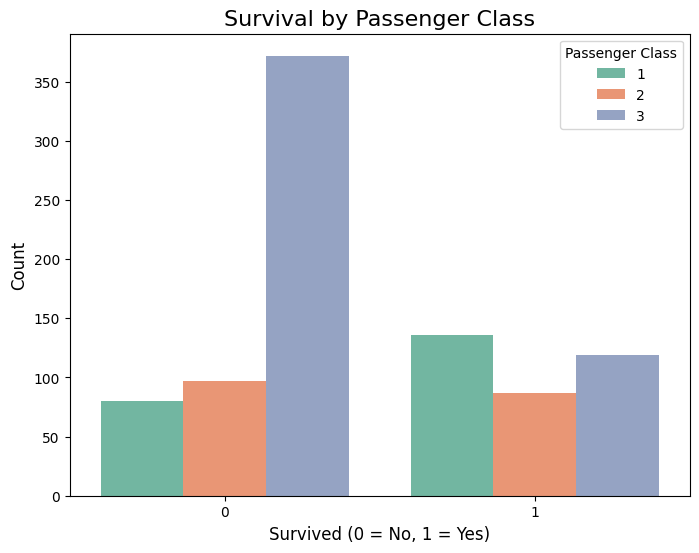

In [25]:
#Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=data, palette="Set2")
plt.title("Survival by Passenger Class", fontsize=16)
plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Passenger Class", fontsize=10)
plt.show()

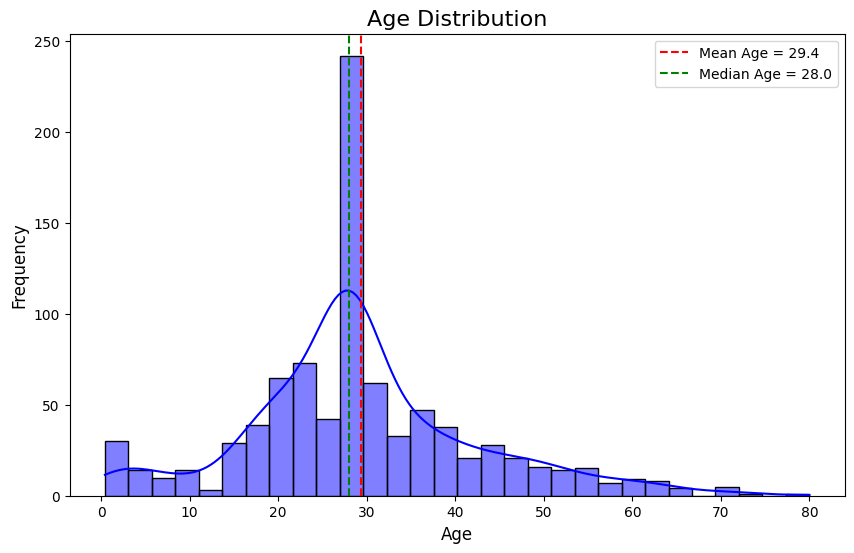

In [26]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(data['Age'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean Age = {data['Age'].mean():.1f}")
plt.axvline(data['Age'].median(), color='green', linestyle='--', linewidth=1.5, label=f"Median Age = {data['Age'].median():.1f}")
plt.legend()
plt.show()

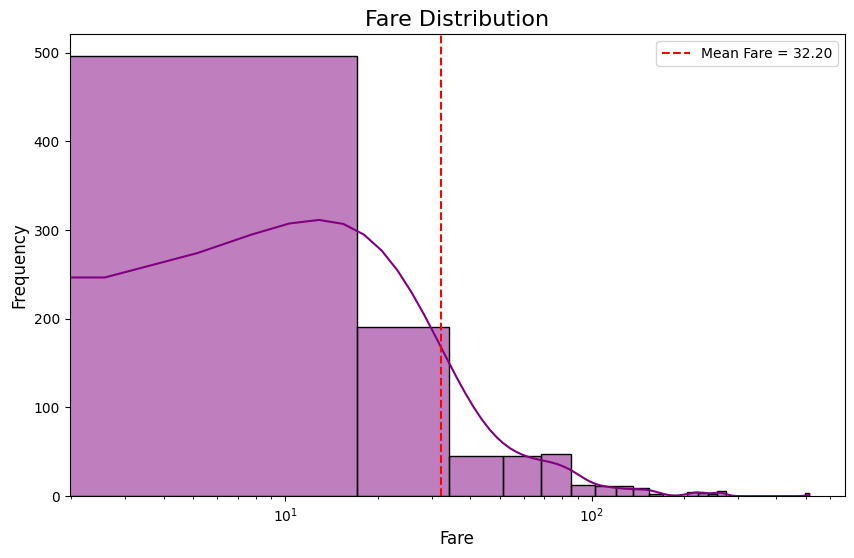

In [27]:
#Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], bins=30, kde=True, color='purple')
plt.title("Fare Distribution", fontsize=16)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xscale("log")
plt.axvline(data['Fare'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean Fare = {data['Fare'].mean():.2f}")
plt.legend()
plt.show()

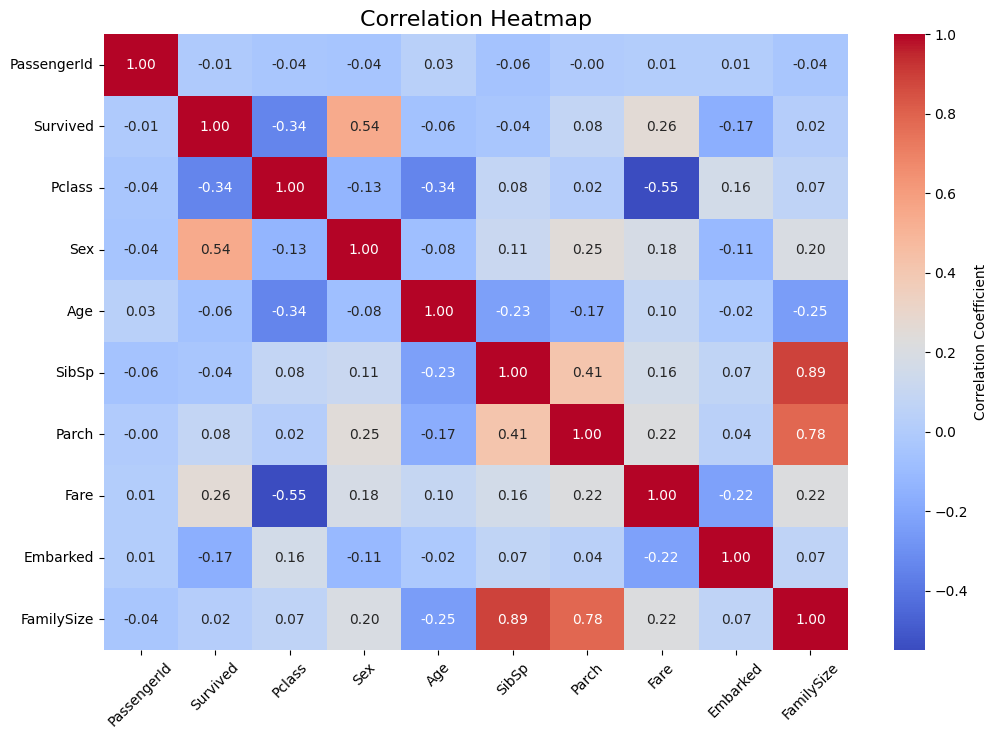

In [28]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.show()

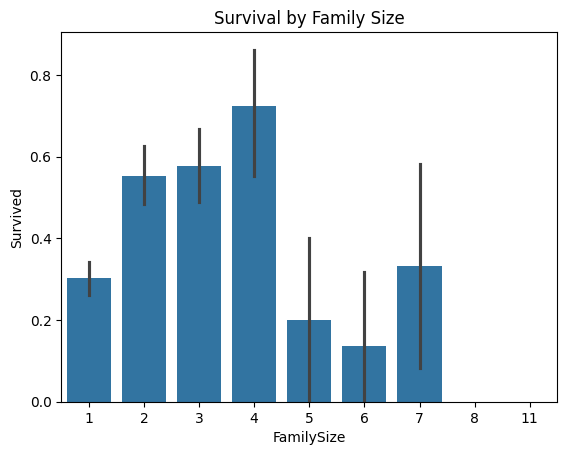

In [43]:
#Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title("Survival by Family Size")
plt.show()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data.to_csv("cleaned_titanic.csv", index=False)

In [45]:
data.to_csv("enhanced_cleaned_titanic.csv", index=False)
print("Enhanced dataset saved as 'enhanced_cleaned_titanic.csv'")

Enhanced dataset saved as 'enhanced_cleaned_titanic.csv'
